In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import optimize
from scipy.optimize import curve_fit

from create_arrays import create_arr

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# import arrays
s = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/avg_spec.txt', dtype=int)
s02 = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/rebins/avg_spec_dt02.txt', dtype=int)
s3 = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/avg_spec.txt', dtype=int)

# wavelengths
line = 1403.
ll = np.arange(line-10,line+10,0.01)

Now, we can animate our rebinned spectrum:

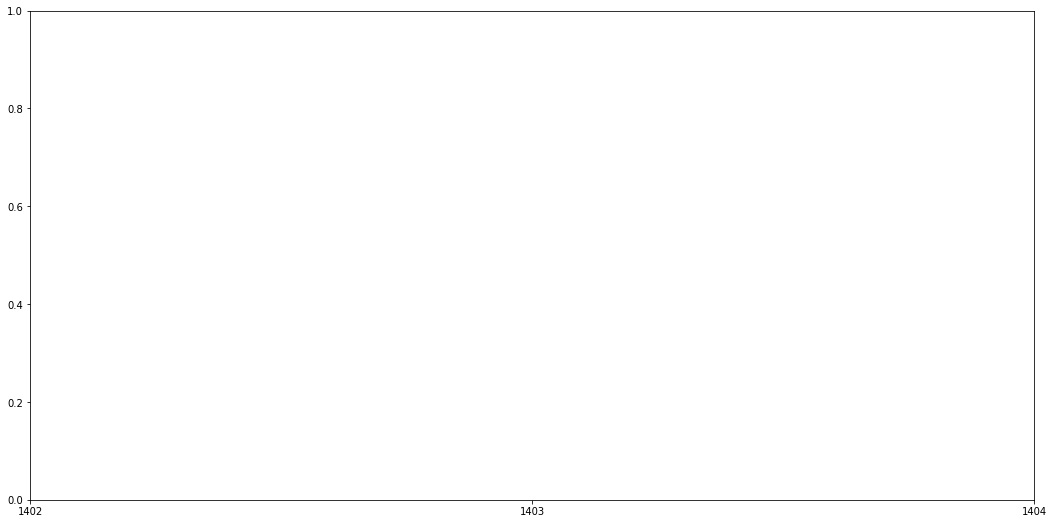

In [3]:
fig, ax = plt.subplots(figsize=(18,9))
ax.set_xlim(1402,1404)
ax.set_xticks(np.arange(1402, 1405, 1))

In [8]:
# data placeholders
wav,spec,spec02,spec3 = np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0) #,np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0),np.zeros(0)

# plot placeholder/object
plot_spec, = ax.plot(wav,spec,color = 'tab:blue')
plot_spec02, = ax.plot(wav,spec02,color = 'tab:orange')
plot_spec3, = ax.plot(wav,spec3,color = 'tab:green')

In [9]:
def update(i):

    global wav
    global spec
    global spec02
    global spec3
    
    
    wav = ll
    spec = s[i,:]
    spec02 = s02[i,:]
    spec3 = s3[i,:]
    
    plot_spec.set_data(wav,spec)
    plot_spec02.set_data(wav,spec02)
    plot_spec3.set_data(wav,spec3)
   
    plot_spec.axes.set_ylim(0,np.max(spec)+0.05*np.max(spec))
    time = np.around(i*2, decimals=1)
    plot_spec.axes.set_ylim(0,np.max(spec)+0.05*np.max(spec))
    plot_spec.axes.set_title('time = '+str(time)+'s')
    plot_spec.axes.ticklabel_format(style='sci',axis='y',useMathText=False,scilimits=(0,2))
    
    return plot_spec,plot_spec02,plot_spec3

In [10]:
simulation = animation.FuncAnimation(fig, update, blit=False, frames=25, interval=20, repeat=False)

In [16]:
HTML(simulation.to_html5_video())

In [11]:
simulation.save(filename='testing.mp4',fps=2,dpi=300)

Save new specturm array to txt file: